In [11]:
#Pour résoudre numériquement une équation différentielle d'ordre supérieur à un, il faut comprendre 
#comment traduire l'équation en un système de plusieurs équations d'ordre 1. Par exemple, y'' + sin(y) = 0 se traduit
# par deux équations : la première est classique : y' = v ; puis comme y'' + sin(y) = 0 alors y'' = -sin(y). Or, 
# y'' = v'. On obtient donc comme seconde équation du système v' = -sin(y) (attention au signe, c'était ta seule
# erreur dans ton programme et ça a tout changé).
# On peut alors écrire le programme comme tu l'as fait, ou bien définir deux fonctions pour expliciter le système
# d'équations:
# f(x, v) = v   et g(x,v) = -sin(x)  (ces deux fonctions aident à traduire la notion de dérivée en informatique,
# c'est ce qui m'a pris beaucoup de temps à comprendre)
# On peut alors appliquer sans réflechir la méthode d'Euler : a = x + h*f(x,v) et b = y + h*g(x,v)

Text(0.5, 1.0, "Portrait de phase de l'oscillateur harmonique non amorti")

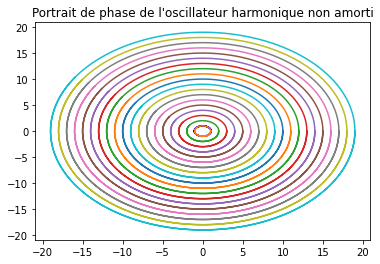

In [12]:
from numpy import sin
import matplotlib.pyplot as plt

def euler(x0, y0, h, tmax): #ta fonction implémente bien la méthode d'Euler (et non pas Euler-Cromer)
    n = int(tmax/h)
    X, V, T = [x0], [y0], [0]
    for k in range(n):
        a = X[k] + h*V[k] #la première équation du système est x' = v
        X.append(a)
        b = V[k] - h*sin(X[k]) #la deuxième équation du système est v' = -sin(x)
        V.append(b)
        T.append(T[k] + h)
    return X, V, T
X, V, T = euler(0, 1, 0.001, 20)
#plt.plot(T, X, 'r')
#plt.plot(X, V, 'b') #le portrait de phase représente la position en abscisse et la vitesse en ordonnée, tu as écrit l'inverse
    
    
#Voici ma réponse à la première question du TD, j'applique la méthode d'Euler-Cromer:
def ohna(x0, v0, h, tmax):
    def f(x, v):   #x' = v
        return v
    def g(x, v):   #v' = -x
        return -x
    t, x, v = 0, x0, v0
    T = [0]
    X = [x0]
    V = [v0]
    n = int(tmax // h)
    for _ in range(n):
        x = x + h*f(x, v)
        v = v + h*g(x, v)
        t += h
        T.append(t)
        X.append(x)
        V.append(v)
    #plt.plot(T, X)
    plt.plot(X, V)
    
for i in range(20):
    ohna(i, 0, 0.001, 10)
plt.title('Portrait de phase de l\'oscillateur harmonique non amorti')